In [65]:
import pandas as pd
import numpy as np

import scipy.stats as stats  # here it for the qqplot 

from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer

In [66]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [67]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [68]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [69]:
# here we removed the nan vlues in the dataframe
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [70]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [71]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [72]:

y = df.iloc[:,0]

In [73]:
x = df.iloc[:,1:]

In [74]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [75]:
x_train 

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [76]:
x_test

,Age,Fare
709,29.699118,15.2458
439,31.000000,10.5000
840,20.000000,7.9250
720,6.000000,33.0000
39,14.000000,11.2417
...,...,...
433,17.000000,7.1250
773,29.699118,7.2250
25,38.000000,31.3875
84,17.000000,10.5000


In [77]:
y_train 

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [78]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12520\3063827784.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


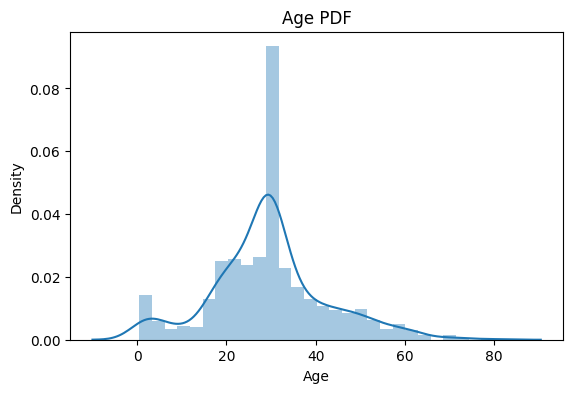

In [79]:
# here we checiking that our data is normal distribution 
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')
plt.show()

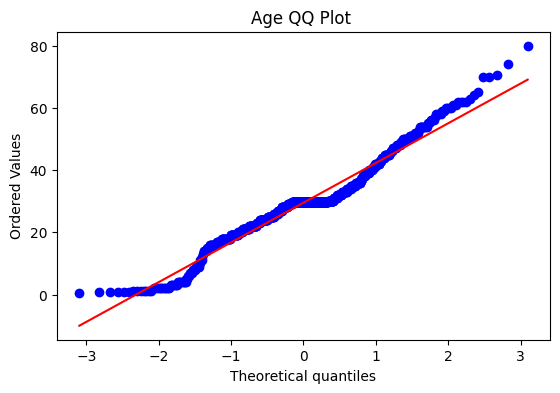

In [80]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist="norm",plot = plt)
plt.title('Age QQ Plot ')


plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12520\4016676865.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


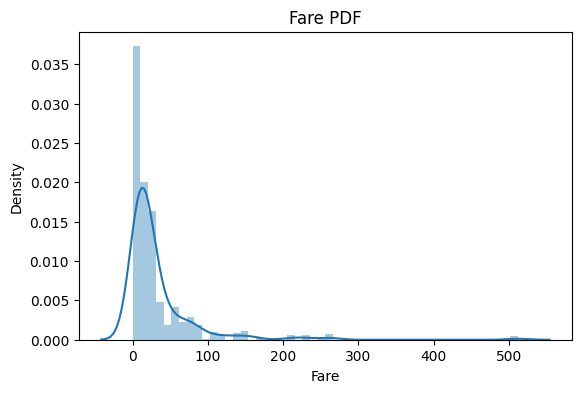

In [81]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')
plt.show()

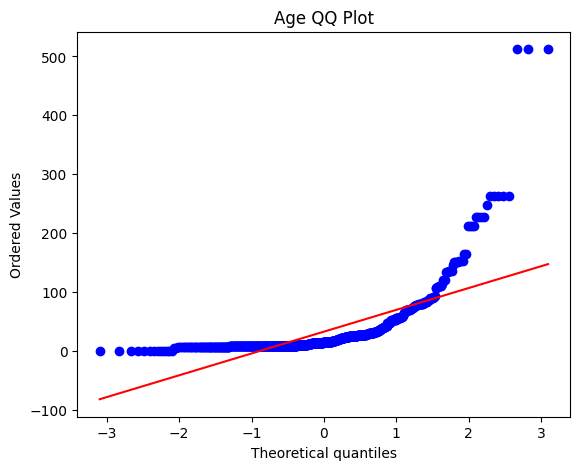

In [82]:
plt.figure(figsize=(14,5))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist= 'norm',plot = plt)
plt.title('Age QQ Plot')
plt.show()

In [83]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [84]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


In [85]:
# here we using the log transform
trf = FunctionTransformer(func=np.log1p)

In [86]:
# Whose data which is not in normal distibution which to convert into the normal 
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

In [87]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1)) 

Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


In [88]:
# now we 
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv= 10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv = 10)))

LR 0.678027465667915
DT 0.6599875156054932


Text(0.5, 1.0, 'Fare Before Log')

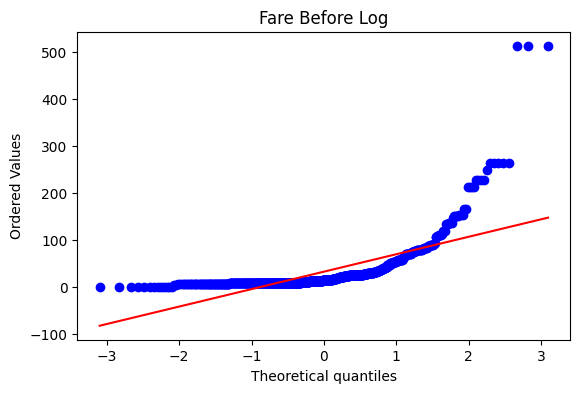

In [89]:
# when we not applyed the Log
plt.figure(figsize=(14,4))

plt.subplot(121)                 # dist = 'norm' ---- > it for the normal distibution 
stats.probplot(x_train['Fare'],dist = 'norm',plot = plt)
plt.title('Fare Before Log')

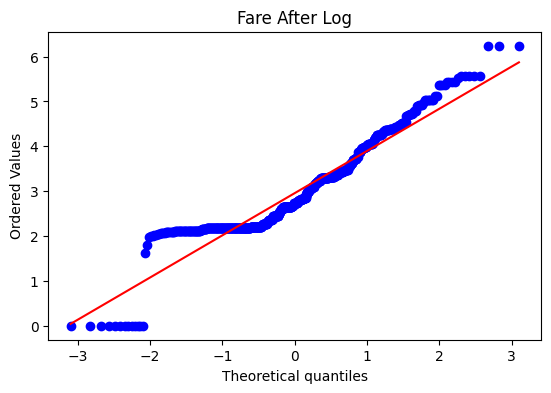

In [90]:
# when we applyed the log 
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train_transformed['Fare'],dist = 'norm',plot = plt)
plt.title('Fare After Log')



plt.show()

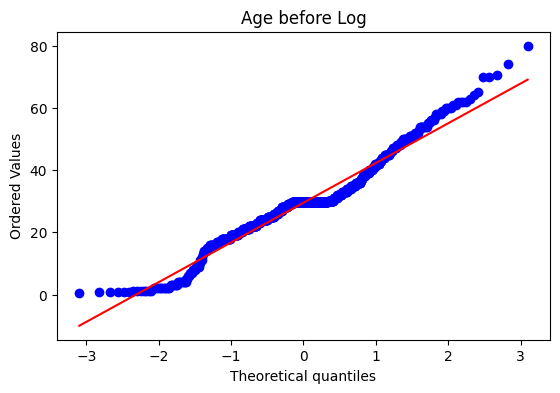

In [91]:
# for the Age 
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot = plt)
plt.title('Age before Log')
plt.show()

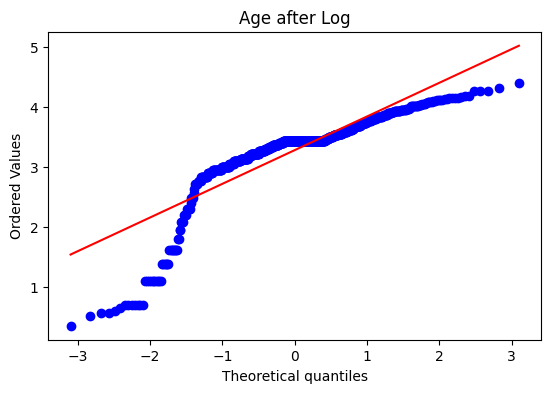

In [92]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(x_train_transformed['Age'],dist='norm',plot = plt)
plt.title('Age after Log')
plt.show()

In [93]:
# here we applyed for the column for the only for the Fare data columns 
trf2= ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder= 'passthrough')


x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.fit_transform(x_test)

In [94]:
# here we agiain we passing the alg 
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)


print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [95]:
# here to soure that our data accuaray it good to check with the cross well valditiion method 
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring = 'accuracy',cv = 10)))
print('DT',np.mean(cross_val_score(clf2,x_transformed,y,scoring = 'accuracy',cv = 10)))

LR 0.678027465667915
DT 0.664494382022472


In [97]:
# here applying all this funtioin transfomer
def apply_transform(transform):
    x = df.iloc[:,1:3]
    y = df.iloc[:,0]


    trf2= ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder= 'passthrough')

    x_trans = trf.fit_transform(x)
    clf = LogisticRegression()

    print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring = 'accuracy',cv = 10)))
    plt.figure(figsize =(10,4))
    
    plt.subplot(121)
    stats.probplot(x['Fare'],dist = 'norm',plot = plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_train_transformed[:,0],dist = 'norm',plot = plt)
    plt.title('Fare After Transform')
    plt.show()

In [64]:
!pip install --upgrade scipy


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------- -------------------------- 20.5/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 247.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB 1.4 MB/s eta 0:00:34
   ---------------------------------------- 0.1/46.2 MB 1.3 MB/s eta 0:00:35
   ---------------------------------------- 0.1/46.2 MB 1.2 MB/s eta 0:00:38
   ---------------------------------------- 0.1/46.2 MB 1.2 MB/s eta 0:00:38
   ---------------------------------------- 0.1/46.2 MB 1.2 MB/s eta 0:00:38
   ---------------------------------------- 0.2/46.2 MB 811.5 kB/s eta 0:00:57
   ---------------------------------------- 0.2/46.2 MB 811.5 kB/s eta 0:00:57
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
ydata-profiling 4.6.5 requires scipy<1.12,>=1.4.1, but you have scipy 1.12.0 which is incompatible.
ydata-profiling 4.6.5 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.2 which is incompatible.
ydata-profiling 4.6.5 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


LR 0.678027465667915


InvalidIndexError: (slice(None, None, None), 0)

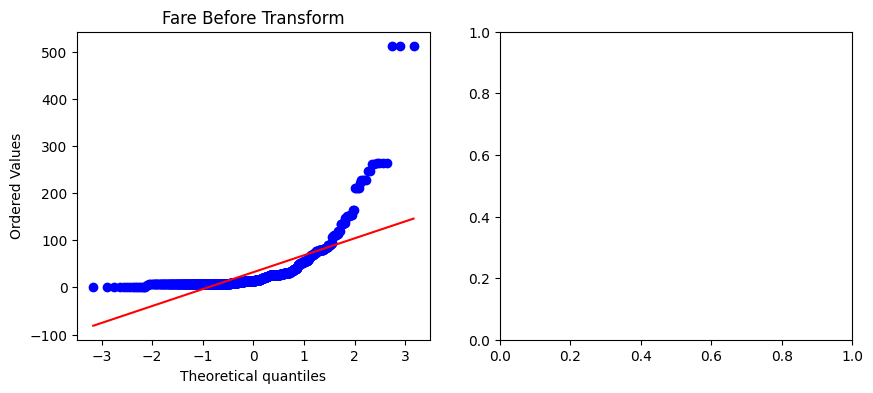

In [98]:
# here we applying the sin funtion on this 
apply_transform(np.sin)

LR 0.678027465667915


InvalidIndexError: (slice(None, None, None), 0)

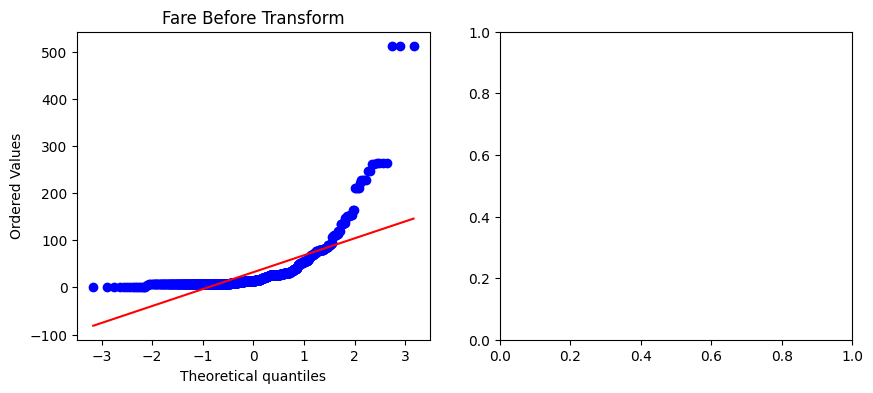

In [99]:
apply_transform(np.sin)


LR 0.678027465667915


InvalidIndexError: (slice(None, None, None), 0)

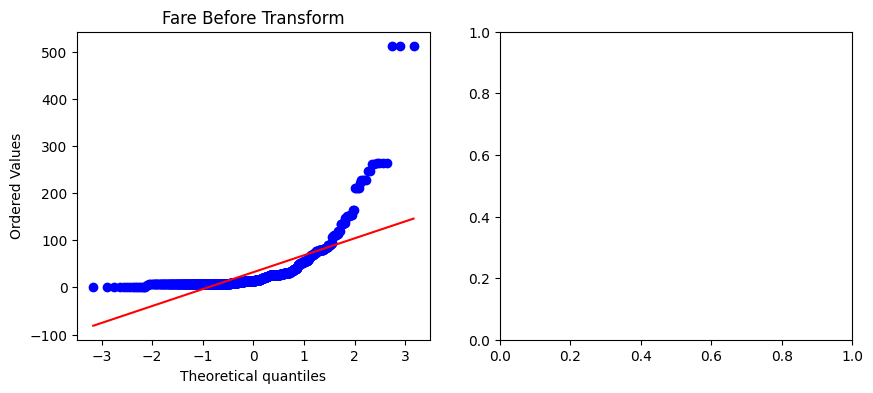

In [57]:
# here using the lambda funtion 
apply_transform(lambda x:x**2)

LR 0.678027465667915


InvalidIndexError: (slice(None, None, None), 0)

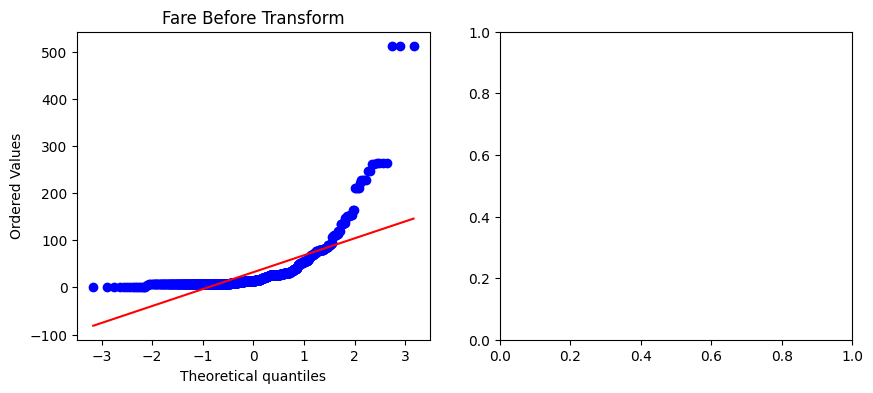

In [60]:
apply_transform(lambda x:1/x)
apply_transform(lambda x:x**1/2)  # squre root 